## Student Test Scores Analysis

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:/AWANI DOCUMENTS/3rd sem/DAI-101 (Data Science)/Assignment/Expanded_data_with_more_features.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
df.Gender.value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

In [44]:
df.EthnicGroup.value_counts()

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: count, dtype: int64

In [47]:
df.ParentEduc.value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

In [75]:
df.TestPrep.value_counts()

TestPrep
none         18856
completed     9955
Name: count, dtype: int64

In [77]:
df.PracticeSport.value_counts()

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

In [79]:
df.TransportMeans.value_counts()

TransportMeans
school_bus    16145
private       11362
Name: count, dtype: int64

In [81]:
df.WklyStudyHours.value_counts()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

In [89]:
df.ParentEduc.value_counts()

ParentEduc
some college          6633
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

In [57]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

### Data Cleaning

In [71]:
df['EthnicGroup'] = df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0])

In [91]:
df["NrSiblings"] = df["NrSiblings"].fillna(df["NrSiblings"].median())
df['TestPrep'] = df['TestPrep'].fillna(df['TestPrep'].mode()[0])
df['ParentMaritalStatus'] = df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0])
df['PracticeSport'] = df['PracticeSport'].fillna(df['PracticeSport'].mode()[0])
df['IsFirstChild'] = df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0])
df['TransportMeans'] = df['TransportMeans'].fillna(df['TransportMeans'].mode()[0])
df['WklyStudyHours'] = df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0])
df['ParentEduc'] = df['ParentEduc'].fillna(df['ParentEduc'].mode()[0])

In [93]:
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### Univariate and Multivariate Analysis

In [100]:
df.groupby("IsFirstChild")[["MathScore", "ReadingScore", "WritingScore"]].mean()

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.724507,69.508106,68.529371


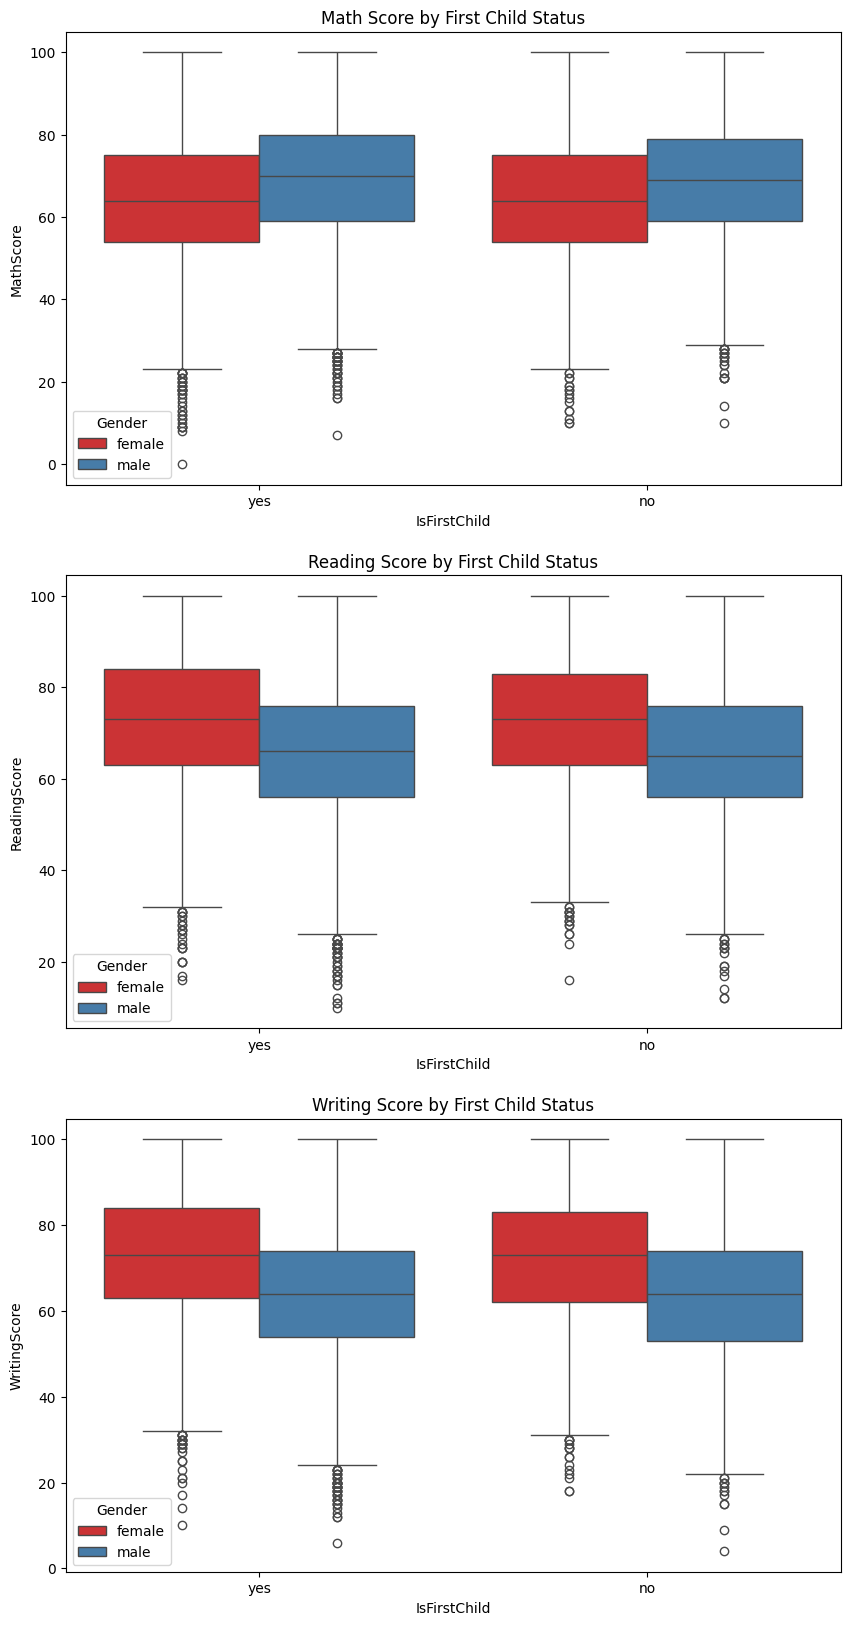

In [141]:
fig, axes = plt.subplots(3,1, figsize=(10,20))

axes[0].set_title("Math Score by First Child Status")
sns.boxplot(x="IsFirstChild", y="MathScore", data=df, ax=axes[0], hue="Gender", palette="Set1")

axes[1].set_title("Reading Score by First Child Status")
sns.boxplot(x="IsFirstChild", y="ReadingScore", data=df, ax=axes[1], hue="Gender", palette="Set1")

axes[2].set_title("Writing Score by First Child Status")
sns.boxplot(x="IsFirstChild", y="WritingScore", data=df, ax=axes[2], hue="Gender", palette="Set1");

* The differences in scores between first-born and non-first-born students are minimal across all three test scores. This suggests that being the first child or not may have only a small effect on test scores.
* From these graphs we can see that the test score in maths is more for males than females but for reading and writing score it is inverted, females have high test score than males whether the child is first-born or not.
* The higher math scores for males may reflect societal stereotypes and educational practices that encourage boys to excel in STEM subjects, while the higher reading and writing scores for females could stem from greater socialization and encouragement in language arts. These trends highlight the influence of gender norms and expectations on academic performance, persisting regardless of birth order.

In [147]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Ethnic_num = ordinal_encoder.fit_transform(df[["EthnicGroup"]])
df["Ethnic_num"] = Ethnic_num

In [149]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Ethnic_num
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,2.0
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,2.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,0.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0


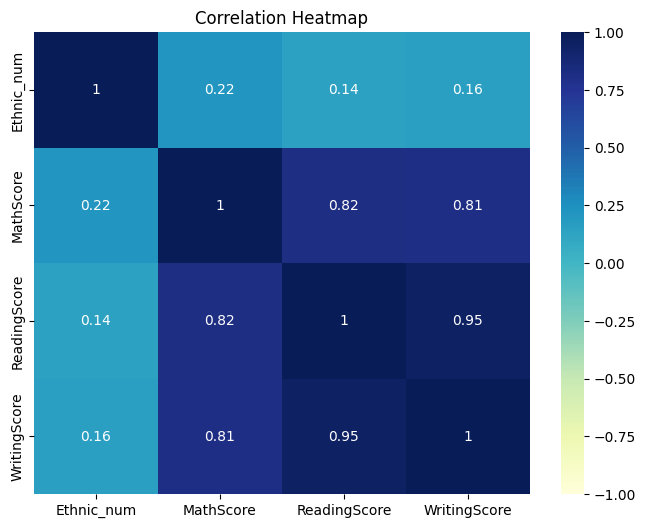

In [162]:
subset_df = df[["Ethnic_num","MathScore","ReadingScore","WritingScore"]]
corr_matrix = subset_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Ethnic group has a weak positive correlation with test scores:
* **MathScore (0.216):** Slight positive correlation, but not strong.
* **WritingScore (0.156):** and ReadingScore (0.141): Even weaker correlations.

This suggests ethnic group has little impact on scores, as other factors (like parental education, study habits) likely play a larger role. Further analysis, such as regression, can help understand these influences better.

In [188]:
df['OverallScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Ethnic_num,OverallScore
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,2.0,72.000000
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,2.0,82.333333
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,90.333333
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,0.0,47.666667
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,2.0,76.333333


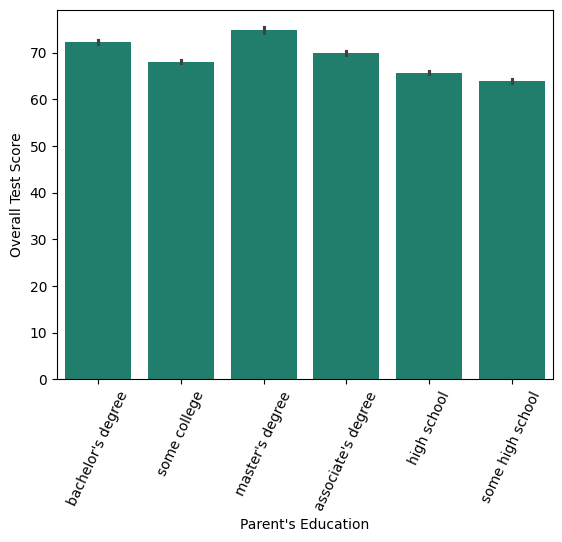

In [192]:
sns.barplot(x="ParentEduc", y="OverallScore", data=df, color="#138d75")
plt.xticks(rotation=65)
plt.xlabel("Parent's Education")
plt.ylabel("Overall Test Score")
plt.show()

* **Positive Correlation:** Higher parental education levels correlate with higher overall test scores, indicating that parental education may influence student performance.
* **Need for Support:** Students from families with lower educational attainment may benefit from additional resources and support to enhance their academic performance.
* **Further Analysis:** Exploring other factors, such as socio-economic status and parental involvement, could provide deeper insights into the reasons behind the observed trends.
* **Actionable Recommendations:** Consider initiatives aimed at improving educational support for families with lower parental education levels to help all students succeed.

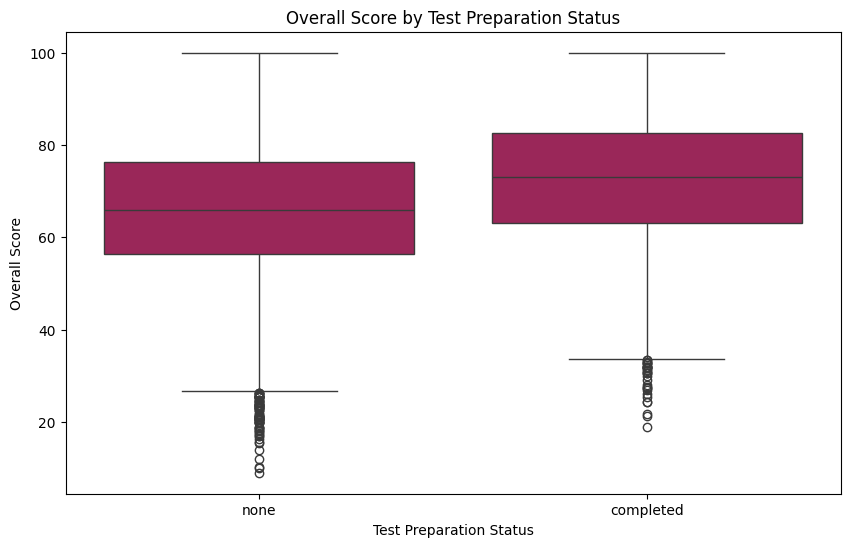

In [198]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TestPrep', y='OverallScore', data=df, color="#ad1457")
plt.title('Overall Score by Test Preparation Status')
plt.xlabel('Test Preparation Status')
plt.ylabel('Overall Score')
plt.show()

* **Impact of Preparation:** Students who prepared for the test achieved higher scores, indicating that preparation positively influences performance.
* **Strong Baseline:** Those who did not prepare also scored well, reflecting a solid foundational knowledge among many students.
* **Minor Score Difference:** The slight difference in scores suggests that while preparation is beneficial, it may not be essential for all students.
* **Encouragement for All:** Encouraging all students to prepare can help maximize their potential and improve scores further.
* **Support Diverse Learning:** Understanding varied learning styles can enhance student success, as some may perform well without formal preparation.

In [212]:
mean_scores_study_hours = df.groupby('WklyStudyHours')[['OverallScore']].mean()
mean_scores_study_hours

,OverallScore
WklyStudyHours,
5 - 10,68.385675
< 5,66.615562
> 10,69.613290


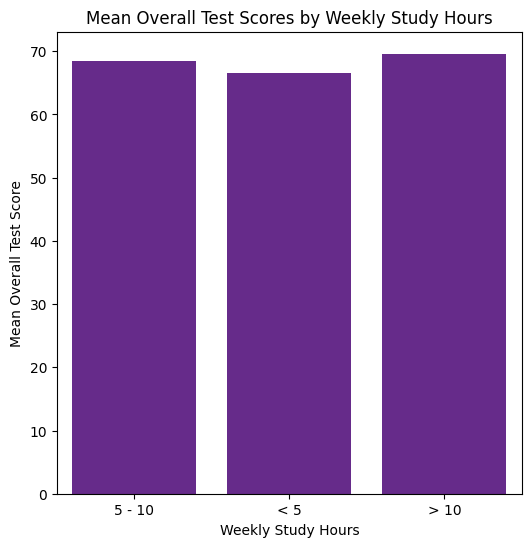

In [218]:
plt.figure(figsize=(6, 6))
sns.barplot(x='WklyStudyHours', y='OverallScore', data=mean_scores_study_hours, color="#6a1b9a")
plt.title('Mean Overall Test Scores by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Mean Overall Test Score')
plt.show()

* **Positive Correlation:** The analysis indicates that students who study more hours each week tend to achieve higher overall test scores.
* **Consistent Trend:** The data suggests a consistent trend where the mean scores increase with more study hours, highlighting the potential impact of dedicated study time on academic performance.
* **Implications:** This trend underscores the importance of effective study habits, suggesting that encouraging students to allocate more time for study could enhance their test performance.

### Insights and Conclusions

* **Birth Order:** Minimal differences in test scores between first-born and non-first-born students suggest that birth order has a slight effect on academic performance.
* **Gender Impact:** Males tend to score higher in math, while females excel in reading and writing, reflecting societal norms and expectations.
* **Ethnic Group Correlation:** Weak positive correlations between ethnic group and test scores indicate that factors like parental education and study habits are more influential on academic performance.
* **Parental Education:** Higher levels of parental education are associated with increased test scores, highlighting the need for support for students from families with lower educational attainment.
* **Test Preparation:** Students who prepared for the test performed better, emphasizing the benefits of preparation while recognizing that many non-prepared students also scored well.
* **Study Habits:** A positive correlation between study hours and test scores suggests that effective study habits significantly enhance academic performance.

These insights can guide recommendations for educational support and initiatives to improve student outcomes.